<Figure size 800x600 with 0 Axes>

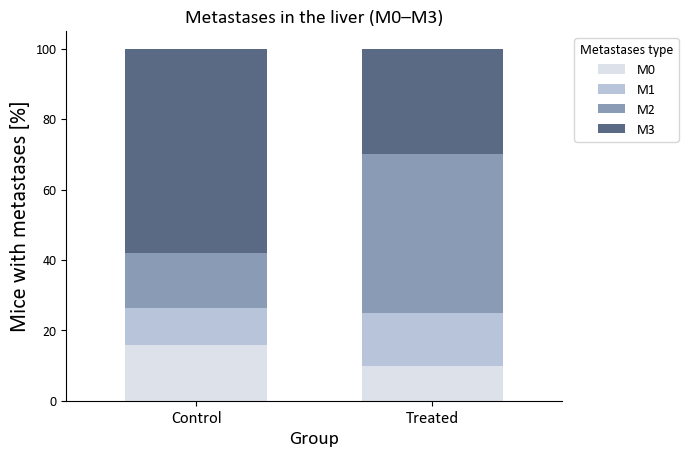

<Figure size 800x400 with 0 Axes>

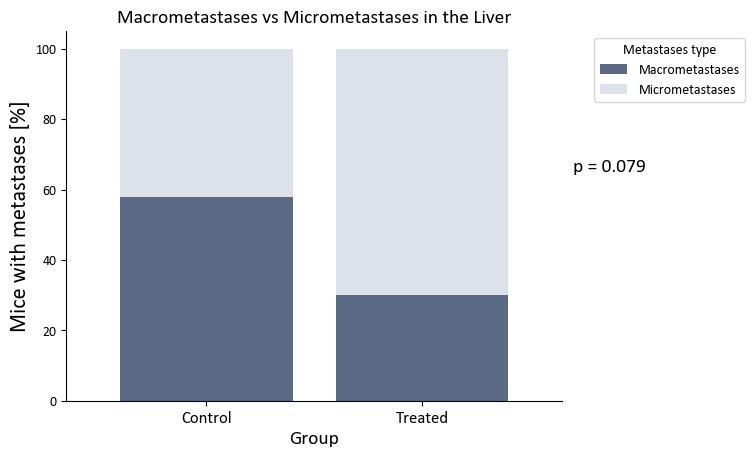

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set font globally
plt.rcParams['font.family'] = 'Calibri'

# Load data
file_path = 'Tkanki klasyfikacja.xlsx'
df = pd.read_excel(file_path, sheet_name="Wątroba - ocena")
#df = df[df["Mouse number"] != 311]  # Delete mouse 311

# Define color palette
colors = [
    "#DCE1EA", 
    "#B7C4D9",
    "#899BB5",
    "#5A6A85"
]

# =============================================================================
# SECTION 1: Full Metastasis Classification (M0–M3) – Stacked Bar Plot
# =============================================================================

# Group by original metastasis categories and calculate percentages
metastases_summary = df.groupby(['Group', 'Liver metastases']).size().unstack(fill_value=0)
metastases_summary = metastases_summary.divide(metastases_summary.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(8, 6))
ax = metastases_summary.plot(
    kind='bar',
    stacked=True,
    color=colors[:len(metastases_summary.columns)],
    width=0.6
)

# Remove frame borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels and title
plt.ylabel('Mice with metastases [%]', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.xticks(fontsize=12, rotation=360)
plt.title('Metastases in the liver (M0–M3)', fontsize=14)
plt.legend(title='Metastases type', bbox_to_anchor=(1.01, 1), loc='upper left')

# Uncomment to save
#plt.savefig("Metastases_full_M0-M3_poster_all mice.png", bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()


# =============================================================================
# SECTION 2: Grouped Classification (Micrometastases vs Macrometastases) + Chi² Test
# =============================================================================

# Copy original dataframe for editing
df_filtered = df.copy()

# Group M0/M1 as Micrometastases; M2/M3 as Macrometastases
df_filtered['Metastases Type'] = df_filtered['Liver metastases'].replace({
    'M0': 'Micrometastases',
    'M1': 'Micrometastases',
    'M2': 'Micrometastases',
    'M3': 'Macrometastases'
})

# Calculate percentage distribution
metastases_grouped = df_filtered.groupby(['Group', 'Metastases Type']).size().unstack(fill_value=0)
metastases_grouped = metastases_grouped.divide(metastases_grouped.sum(axis=1), axis=0) * 100

# Plot
grouped_colors = ["#5A6A85", "#DCE1EA"]
plt.figure(figsize=(8, 4))
ax = metastases_grouped.plot(
    kind='bar',
    stacked=True,
    color=grouped_colors[:len(metastases_grouped.columns)],
    width=0.8
)

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Chi-squared test (no Yates correction)
contingency_table = pd.crosstab(df_filtered['Group'], df_filtered['Metastases Type'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table, correction=False)

# Add p-value to the plot
plt.text(
    len(metastases_grouped) - 0.3,
    max(metastases_grouped.sum(axis=1)) - 35,
    f'p = {p_value:.3f}',
    fontsize=14,
    ha='left',
    color='black'
)

# Labels and title
plt.ylabel('Mice with metastases [%]', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.xticks(fontsize=12, rotation=360)
plt.title('Macrometastases vs Micrometastases in the Liver', fontsize=14)
plt.legend(title='Metastases type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Uncomment to save
#plt.savefig("Macrometastases_vs_Micrometastases_poster_all mice.png", bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()